In [1]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# load data set
df = pd.read_csv('..\onlineRetail.csv', encoding='latin1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


##### Descriptive Stats

In [3]:
df.info()
df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Exploratory Data Analysis

###### Monthly Revenue

In [4]:
# convert 'InvoiceDate' from string to data time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# create another column called 'InvoiceYearMonth' that contains just the year and month of purchase
df['InvoiceMonthYear'] = df['InvoiceDate'].dt.to_period('M')

#calculate Revenue for each 'InvoiceNo' 
df['Revenue'] = df['UnitPrice'] * df['Quantity']

# create new dataframe with 'InvoiceYearMonth' and 'Revenue' as the two columns
# calculate revenue for each month
df_revenue = df.groupby(['InvoiceMonthYear'])['Revenue'].sum().reset_index()
df_revenue

,InvoiceMonthYear,Revenue
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121
5,2011-05,723333.510
6,2011-06,691123.120
7,2011-07,681300.111
8,2011-08,682680.510
9,2011-09,1019687.622


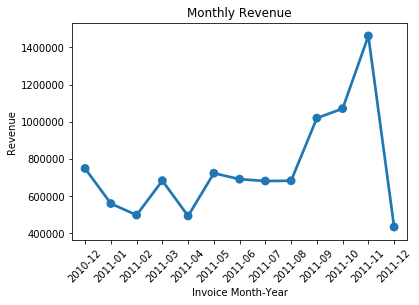

In [5]:
# Visualize monthly revenue
# visualize monthly growth rate
sns.pointplot(x = 'InvoiceMonthYear', y = 'Revenue', data = df_revenue)

# set title
plt.title('Monthly Revenue')

# Set x-axis label
plt.xlabel('Invoice Month-Year')

# Set y-axis label
plt.ylabel('Revenue')

# Rotate x-labels
plt.xticks(rotation=45)
plt.show()

In [6]:
# Revenue is continuously growing especially Aug ‘11 onwards and then
# suddenly drops in December. This is because the data in dec is incomplete.
# let’s figure out Monthly Revenue Growth Rate
# calculte monthly revenue growth rate using pct_change() function
df_revenue['MonthlyGrowth'] = df_revenue['Revenue'].pct_change()
df_revenue

,InvoiceMonthYear,Revenue,MonthlyGrowth
0,2010-12,748957.020,NaN
1,2011-01,560000.260,-0.252293
2,2011-02,498062.650,-0.110603
3,2011-03,683267.080,0.371850
4,2011-04,493207.121,-0.278163
5,2011-05,723333.510,0.466592
6,2011-06,691123.120,-0.044530
7,2011-07,681300.111,-0.014213
8,2011-08,682680.510,0.002026
9,2011-09,1019687.622,0.493653


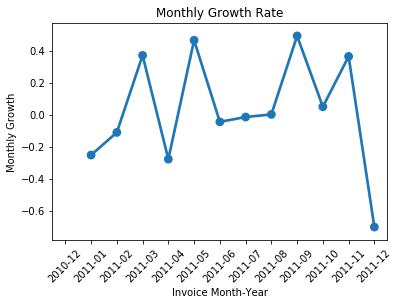

In [7]:
# visualize monthly growth rate
sns.pointplot(x = 'InvoiceMonthYear', y = 'MonthlyGrowth', data = df_revenue)

# set title
plt.title('Monthly Growth Rate')

# Set x-axis label
plt.xlabel('Invoice Month-Year')

# Set y-axis label
plt.ylabel('Monthly Growth')

# Rotate x-labels
plt.xticks(rotation=45)
plt.show()

In [8]:
# Ignore the drop in December since the data in incomplete.
# April shows a sudden drop. Let's do further analysis to identify the cause.
# Was it due to less active customers or less orders or they just started to buy cheaper products? 

# First, lets calculate the montly active customers.
#create monthly active customers dataframe by counting unique Customer IDs
df_monthly_active = df.groupby('InvoiceMonthYear')['CustomerID'].nunique().reset_index()
df_monthly_active


,InvoiceMonthYear,CustomerID
0,2010-12,948
1,2011-01,783
2,2011-02,798
3,2011-03,1020
4,2011-04,899
5,2011-05,1079
6,2011-06,1051
7,2011-07,993
8,2011-08,980
9,2011-09,1302


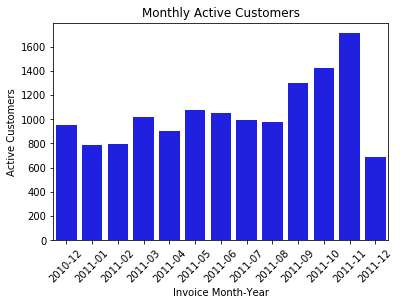

In [9]:
# visualize monthly active customers
sns.barplot(x = 'InvoiceMonthYear', y = 'CustomerID', data = df_monthly_active, color = 'b')

# set title
plt.title('Monthly Active Customers')

# Set x-axis label
plt.xlabel('Invoice Month-Year')

# Set y-axis label
plt.ylabel('Active Customers')

# Rotate x-labels
plt.xticks(rotation=45)
plt.show()

In [10]:
# In April, monthly active customers dropped from 1020 to 899.
# The same trend in order numbers is also expected.
# Lets calculate montly orders in a similar manner
df_monthly_orders = df.groupby('InvoiceMonthYear')['Quantity'].sum().reset_index()
df_monthly_orders

,InvoiceMonthYear,Quantity
0,2010-12,342228
1,2011-01,308966
2,2011-02,277989
3,2011-03,351872
4,2011-04,289098
5,2011-05,380391
6,2011-06,341623
7,2011-07,391116
8,2011-08,406199
9,2011-09,549817


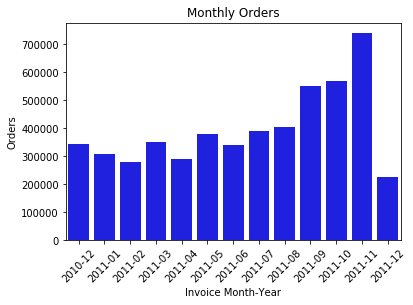

In [11]:
# visualization
sns.barplot(x = 'InvoiceMonthYear', y = 'Quantity', data = df_monthly_orders, color = 'b')

# set title
plt.title('Monthly Orders')

# Set x-axis label
plt.xlabel('Invoice Month-Year')

# Set y-axis label
plt.ylabel('Orders')

# Rotate x-labels
plt.xticks(rotation=45)
plt.show()

In [12]:
# order count decreased from 351k to 289k
# lets also check average revenue per order
df_monthly_order_avg = df.groupby('InvoiceMonthYear')['Revenue'].mean().reset_index()
df_monthly_order_avg

,InvoiceMonthYear,Revenue
0,2010-12,17.630400
1,2011-01,15.933088
2,2011-02,17.976058
3,2011-03,18.593313
4,2011-04,16.486399
5,2011-05,19.533716
6,2011-06,18.742830
7,2011-07,17.240248
8,2011-08,19.348161
9,2011-09,20.301987


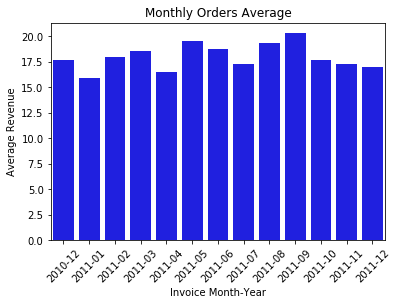

In [13]:
# visualization
sns.barplot(x = 'InvoiceMonthYear', y = 'Revenue', data = df_monthly_order_avg, color = 'b')

# set title
plt.title('Monthly Orders Average')

# Set x-axis label
plt.xlabel('Invoice Month-Year')

# Set y-axis label
plt.ylabel('Average Revenue')

# Rotate x-labels
plt.xticks(rotation=45)
plt.show()

In [14]:
# similar drop in average revenue in April from 18.6 to 16.5
# Now lets look at the number of new customers every month. 
# customer ratio is an indictor of if we are losing customers or unable to attract new ones.
# new customer is defined as someone who made the first purchase in our defined time window, in this case monthly.
#create a dataframe contaning CustomerID and first purchase date
# lets use the min() function on the Invoice date to find out the first purchase for every customer
df_first_purchase = df.groupby('CustomerID').InvoiceDate.min().reset_index()
df_first_purchase.columns = ['CustomerID','FirstPurchaseDate']
df_first_purchase['FirstPurchaseMonthYear'] = df_first_purchase['FirstPurchaseDate'].dt.to_period('M')
df_first_purchase.head()

,CustomerID,FirstPurchaseDate,FirstPurchaseMonthYear
0,12346.0,2011-01-18 10:01:00,2011-01
1,12347.0,2010-12-07 14:57:00,2010-12
2,12348.0,2010-12-16 19:09:00,2010-12
3,12349.0,2011-11-21 09:51:00,2011-11
4,12350.0,2011-02-02 16:01:00,2011-02


In [15]:
# lets merge df_first_purchase dataframe with our original data frame
df = pd.merge(df, df_first_purchase, on='CustomerID')

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear,Revenue,FirstPurchaseDate,FirstPurchaseMonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,2010-12-01 08:26:00,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,2010-12-01 08:26:00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12


In [19]:
# lets label customers as new or existing and store it in a column called User Type
#if User's First Purchase Year Month before the selected Invoice Year Month
df['UserType'] = 'New'
df.loc[df['InvoiceMonthYear']>df['FirstPurchaseMonthYear'],'UserType'] = 'Existing'


In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear,Revenue,FirstPurchaseDate,FirstPurchaseMonthYear,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,2010-12-01 08:26:00,2010-12,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,2010-12-01 08:26:00,2010-12,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12,New


In [21]:
#calculate the Revenue per month for each user type
df_user_type_revenue = df.groupby(['InvoiceMonthYear','UserType'])['Revenue'].sum().reset_index()

In [23]:
#before plotting remove the december dates
df_user_type_revenue = df_user_type_revenue.query("InvoiceMonthYear != 201012 and InvoiceMonthYear != 201112")

In [24]:
df_user_type_revenue

,InvoiceMonthYear,UserType,Revenue
1,2011-01,Existing,271616.520
2,2011-01,New,203457.860
3,2011-02,Existing,287024.770
4,2011-02,New,149521.380
5,2011-03,Existing,390034.530
6,2011-03,New,189930.080
7,2011-04,Existing,306283.600
8,2011-04,New,119764.251
9,2011-05,Existing,532392.340
10,2011-05,New,115858.740


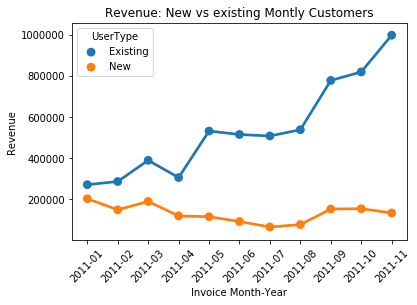

In [26]:
# visualize montly revenue from new and existing customers
sns.pointplot(x = 'InvoiceMonthYear', y = 'Revenue', data = df_user_type_revenue, hue = 'UserType')

# set title
plt.title('Revenue: New vs existing Montly Customers')

# Set x-axis label
plt.xlabel('Invoice Month-Year')

# Set y-axis label
plt.ylabel('Revenue')

# Rotate x-labels
plt.xticks(rotation=45)
plt.show()


In [28]:
# existing customers show an increasing trend but new customers show a slight decrease
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
df_new_customer_ratio = df.query("UserType == 'New'").groupby(['InvoiceMonthYear'])['CustomerID'].nunique()/df.query("UserType == 'Existing'").groupby(['InvoiceMonthYear'])['CustomerID'].nunique() 
df_new_customer_ratio = df_new_customer_ratio.reset_index()
df_new_customer_ratio = df_new_customer_ratio.dropna()

In [30]:
df_new_customer_ratio

,InvoiceMonthYear,CustomerID
1,2011-01,1.162983
2,2011-02,0.909091
3,2011-03,0.758621
4,2011-04,0.498333
5,2011-05,0.348750
6,2011-06,0.287990
7,2011-07,0.238155
8,2011-08,0.205412
9,2011-09,0.296813
10,2011-10,0.328052


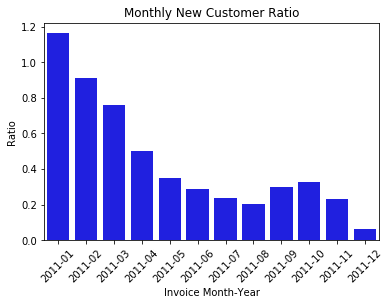

In [34]:
# visulaize new customer ratio
sns.barplot(x = 'InvoiceMonthYear', y = 'CustomerID', data = df_new_customer_ratio, color = 'b')

# set title
plt.title('Monthly New Customer Ratio')

# Set x-axis label
plt.xlabel('Invoice Month-Year')

# Set y-axis label
plt.ylabel('Ratio')

# Rotate x-labels
plt.xticks(rotation=45)
plt.show()

In [35]:
# As expected, a steady decrease in the new customer ratio is observed
# Last thing to check is the monthly retention rate. 
# This is an indicator of how well products do in the market or if the service is good.
#identify which users are active by looking at their revenue per month
df_customer_revenue = df.groupby(['CustomerID','InvoiceMonthYear'])['Revenue'].sum().reset_index()

#create retention matrix with crosstab
df_retention_rate = pd.crosstab(df_customer_revenue['CustomerID'], df_customer_revenue['InvoiceMonthYear']).reset_index()

df_retention_rate.head()

InvoiceMonthYear,CustomerID,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [49]:
# Customer Segmentation Analysis
# RFM analysis
# Calculate Recency
# create a new dataframe by grouping customers according to their ID and get their latest purchase date using max() function
df_latest_purchase = df.groupby('CustomerID').InvoiceDate.max().reset_index()
df_latest_purchase.columns = ['CustomerID','LatestPurchaseDate']
df_latest_purchase.head()

,CustomerID,LatestPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [50]:
# to calculate recency, we first obtain the latest purchase date in the whole dataset
# then subtract the latest date of all customers from the latest purchase date in the whole dataset
df_latest_purchase['Recency'] = (df_latest_purchase['LatestPurchaseDate'].max() - df_latest_purchase['LatestPurchaseDate']).dt.days
df_latest_purchase.head()

,CustomerID,LatestPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


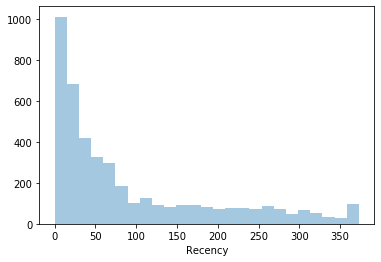

In [55]:
# lets visualize recency with a histogram
sns.distplot(df_latest_purchase['Recency'], kde = False)

In [56]:
# lets use the describe function to get stats about recency
df_latest_purchase['Recency'].describe()


count    4372.000000
mean       91.047118
std       100.765435
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [65]:
# mean recency is 91 days and median is 49 days
# now we use K-means clustering method to segment the data and assign a recency score
# to find out no. of clusters, we use the elbow method
from sklearn.cluster import KMeans

recency = df_latest_purchase[['Recency']]
squared_error = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, max_iter=1000).fit(recency)
    df_latest_purchase["clusters"] = kmeans.labels_
    squared_error.append(kmeans.inertia_)

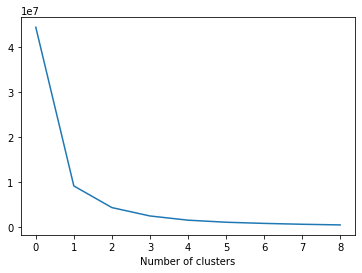

In [66]:
plt.figure()
plt.plot(squared_error)
plt.xlabel("Number of clusters")
plt.show()

In [88]:
# 3 or 4 custers seems optimum for this dataset. Lets go with 4
# train kmeans using 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_latest_purchase[['Recency']])
df_latest_purchase['RecencyCluster'] = kmeans.predict(df_latest_purchase[['Recency']])

# lets look at how the labels have been assigned by using decsribe function on Recency
df_latest_purchase.groupby('RecencyCluster')['Recency'].describe()


,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,2167.0,17.538533,13.320860,0.0,6.0,16.0,28.00,48.0
1,627.0,189.451356,32.948533,135.0,161.0,187.0,217.00,249.0
2,506.0,308.851779,39.144563,250.0,274.0,305.0,350.75,373.0
3,1072.0,79.278918,23.875838,49.0,59.0,73.0,95.00,134.0


In [90]:
# labels have been assigned in random order
# lets reorder it so that 0 corresponds to most inactive customers and 3 to most active customers
# lets create a function for that
def reorder_clusters(cluster_label, target_column,df,ascending):
    df_new = df.groupby(cluster_label)[target_column].mean().reset_index()
    df_new = df_new.sort_values(by=target_column,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_label,'index']], on=cluster_label)
    df_final = df_final.drop([cluster_label],axis=1)
    df_final = df_final.rename(columns={"index":cluster_label})
    return df_final

In [91]:
df_latest_purchase = reorder_clusters('RecencyCluster', 'Recency',df_latest_purchase,False)

In [92]:
# lets see the rearranged result
df_latest_purchase.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,506.0,308.851779,39.144563,250.0,274.0,305.0,350.75,373.0
1,627.0,189.451356,32.948533,135.0,161.0,187.0,217.00,249.0
2,1072.0,79.278918,23.875838,49.0,59.0,73.0,95.00,134.0
3,2167.0,17.538533,13.320860,0.0,6.0,16.0,28.00,48.0


In [81]:
# now cluster 3 represents most active customers and 0 represents most inactive ones.

In [93]:
# Frequency
# To create frequency clusters, we need to find total number orders for each customer.
# First, lets calculate order frequency and plot its distribution
df_frequency = df.groupby('CustomerID').InvoiceDate.count().reset_index()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.head()


,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


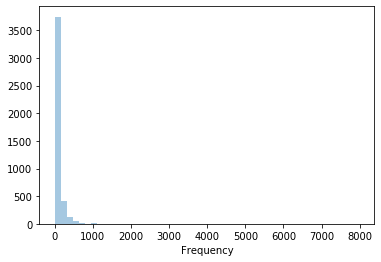

In [94]:
# lets visualize recency with a histogram
sns.distplot(df_frequency['Frequency'], kde = False)

In [95]:
df_frequency['Frequency'].describe()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: Frequency, dtype: float64

In [98]:
# now we do the same kmeans analysis for frequency
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_frequency[['Frequency']])
df_frequency['FrequencyCluster'] = kmeans.predict(df_frequency[['Frequency']])

# lets look at how the labels have been assigned by using decsribe function on Recency
df_frequency.groupby('FrequencyCluster')['Frequency'].describe()


,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3862.0,49.753755,44.812998,1.0,15.0,34.0,73.0,189.0
1,4.0,5914.000000,1473.845537,4642.0,5006.5,5515.5,6423.0,7983.0
2,24.0,1349.750000,508.637759,872.0,1003.5,1156.0,1541.0,2782.0
3,482.0,329.107884,132.670589,190.0,228.0,286.0,393.5,803.0


In [100]:
df_frequency = reorder_clusters('FrequencyCluster', 'Frequency',df_frequency,True)

In [101]:
df_frequency.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3862.0,49.753755,44.812998,1.0,15.0,34.0,73.0,189.0
1,482.0,329.107884,132.670589,190.0,228.0,286.0,393.5,803.0
2,24.0,1349.750000,508.637759,872.0,1003.5,1156.0,1541.0,2782.0
3,4.0,5914.000000,1473.845537,4642.0,5006.5,5515.5,6423.0,7983.0


In [102]:
# aftr ordering the clusters, same notation as recency is followed
# cluster 3 contains the best customers and cluster 0 contains the worst customers

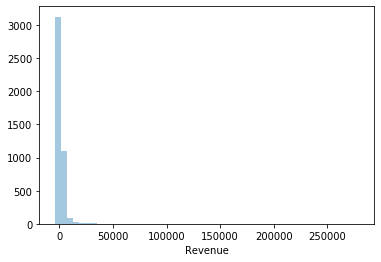

In [106]:
# Monetory value
# lets calculate revenue from each customer, plot the distribution and apply Kmeans to assign clusters
df_revenue = df.groupby('CustomerID')['Revenue'].sum().reset_index()
df_revenue.columns = ['CustomerID','Revenue']
sns.distplot(df_revenue['Revenue'], kde = False)

In [107]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_revenue[['Revenue']])
df_revenue['RevenueCluster'] = kmeans.predict(df_revenue[['Revenue']])

# lets look at how the labels have been assigned by using decsribe function on Recency
df_revenue.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,4252.0,1160.746285,1403.441736,-4287.63,286.565,623.575,1476.0700,8257.04
1,3.0,241136.560000,47874.073443,187482.17,221960.330,256438.490,267963.7550,279489.02
2,15.0,71423.516000,28632.631870,50415.49,52287.280,57385.880,77008.7300,132572.62
3,102.0,15390.295980,7557.269118,8393.22,10192.235,12395.080,17460.8075,40340.78


In [109]:
df_revenue = reorder_clusters('RevenueCluster', 'Revenue',df_revenue,True)
df_revenue.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,4252.0,1160.746285,1403.441736,-4287.63,286.565,623.575,1476.0700,8257.04
1,102.0,15390.295980,7557.269118,8393.22,10192.235,12395.080,17460.8075,40340.78
2,15.0,71423.516000,28632.631870,50415.49,52287.280,57385.880,77008.7300,132572.62
3,3.0,241136.560000,47874.073443,187482.17,221960.330,256438.490,267963.7550,279489.02


In [123]:
# lets do overall segmentation of the data based on RFM and assign a overall score
# first lets merge the 3 dataframes with our original dataframe
df = pd.merge(df, df_revenue, on='CustomerID')
df = pd.merge(df, df_frequency, on='CustomerID')
df = pd.merge(df, df_latest_purchase, on='CustomerID')

In [124]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear,Revenue_x,...,FirstPurchaseMonthYear,UserType,Revenue_y,RevenueCluster,Frequency,FrequencyCluster,LatestPurchaseDate,Recency,clusters,RecencyCluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,...,2010-12,New,5288.63,0,312,1,2011-02-10 14:38:00,301,2,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,...,2010-12,New,5288.63,0,312,1,2011-02-10 14:38:00,301,2,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,...,2010-12,New,5288.63,0,312,1,2011-02-10 14:38:00,301,2,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,...,2010-12,New,5288.63,0,312,1,2011-02-10 14:38:00,301,2,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,...,2010-12,New,5288.63,0,312,1,2011-02-10 14:38:00,301,2,0


In [125]:
df['OverallScore'] = df['RecencyCluster'] + df['FrequencyCluster'] + df['RevenueCluster']


KeyError: "Columns not found: 'Revenue'"

In [126]:
df.groupby('OverallScore')['Recency','Frequency','Revenue_y'].mean()

,Recency,Frequency,Revenue_y
OverallScore,,,
0,305.565384,50.268306,636.656994
1,186.937729,71.385535,1001.806927
2,80.551313,90.209303,1379.386169
3,22.676119,115.705447,1819.697768
4,12.886099,364.873104,4088.970551
5,7.243503,693.786000,11825.837245
6,5.607608,1453.256776,31494.945158
7,1.478372,4618.117618,56075.420781
8,1.331885,4993.063281,126427.783550


In [189]:
df_res = df.groupby('CustomerID')['RecencyCluster','FrequencyCluster','Revenue_y'].mean()

In [191]:
df_res = df_res.dropna()
heatmap_df = pd.pivot_table(df_res, values='Revenue_y', index=['RecencyCluster'], columns='FrequencyCluster')

In [194]:
heatmap_df

FrequencyCluster,0,1,2,3
RecencyCluster,,,,
0,343.315179,4506.700000,NaN,NaN
1,574.397103,1930.205000,NaN,NaN
2,910.540273,2842.956750,NaN,NaN
3,1485.476036,7143.157581,33515.435833,64776.6025


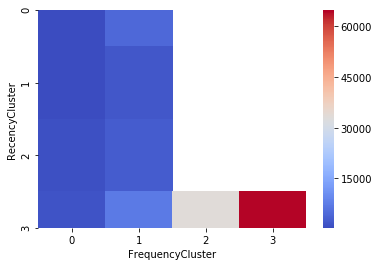

In [193]:
sns.heatmap(heatmap_df, cmap='coolwarm')

In [201]:
# According to the above scoring, customers in the group 8 are the best and 0 are the worst
# lets name these scores now:
# 0 to 2 - Low Value: improve frequency for these customers
# 3 to 4 - Mid Value: improve retenion rate and frequency for these customers
# 5+ - High Value: improve retenion rate for these customers
# lets assign these names to our data frame
df['Segment'] = 'Low-Value'
df.loc[df['OverallScore']>2,'Segment'] = 'Mid-Value' 
df.loc[df['OverallScore']>4,'Segment'] = 'High-Value'

In [202]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonthYear,Revenue_x,...,Revenue_y,RevenueCluster,Frequency,FrequencyCluster,LatestPurchaseDate,Recency,clusters,RecencyCluster,OverallScore,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,...,5288.63,0,312,1,2011-02-10 14:38:00,301,2,0,1,Low-Value
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,...,5288.63,0,312,1,2011-02-10 14:38:00,301,2,0,1,Low-Value
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,...,5288.63,0,312,1,2011-02-10 14:38:00,301,2,0,1,Low-Value
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,...,5288.63,0,312,1,2011-02-10 14:38:00,301,2,0,1,Low-Value
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,...,5288.63,0,312,1,2011-02-10 14:38:00,301,2,0,1,Low-Value


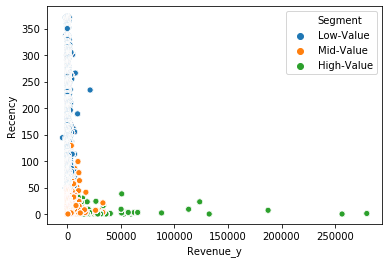

In [203]:
# lets visualize RFM clusters on a scatter plot
# Recency vs Revenue
sns.scatterplot(x = 'Revenue_y', y='Recency', hue='Segment', data=df)

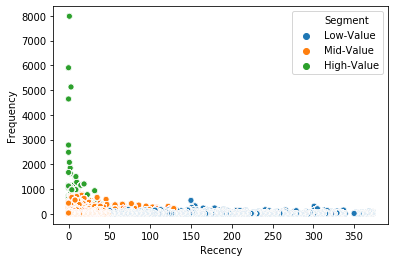

In [204]:
# Recency vs Frequency
sns.scatterplot(x = 'Recency', y='Frequency', hue='Segment', data=df)

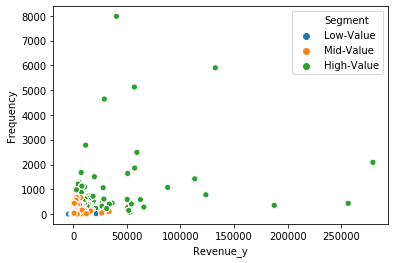

In [205]:
# Revenue vs Frequency
sns.scatterplot(x = 'Revenue_y', y='Frequency', hue='Segment', data=df)

In [ ]:
# Customer Lietime value prediction